# Single Model Energy-depedent Classification Performance Analysis

In [1]:
%matplotlib inline
import setup

# Simply Run the usual experiment, using -L option to specify the model to load
# Sets up the model and the data

%run -im CaloDNN.ClassificationExperiment -- --NoAnalysis --NoTrain --cpu -L TrainedModels/CaloDNN_128_3_0.001_RMSprop_0.01_Merged.1 

Using CPU.
HyperParameter Scan:  240 possible combiniations.
______________________________________
ScanConfiguration
______________________________________
Picked combination:  0
Combo[0]={'Width': 32, 'Depth': 1, 'lr': 0.01, 'optimizer': "'RMSprop'", 'decay': 0.01}
Model Filename:  CaloDNN_32_1_0.01_RMSprop_0.01
______________________________________
Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.


Using PremixGenerator.
Loading Model From: TrainedModels/CaloDNN_128_3_0.001_RMSprop_0.01_Merged.1
Output Directory: TrainedModels/CaloDNN_128_3_0.001_RMSprop_0.01_Merged.1.1
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 25, 25, 25)    0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 5, 5, 60)      0                                            
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 15625)         0                                            
____________________________________________________________________________________________________
flatten_2 (Flatte

In [3]:
N_Test_Events=100000
Test_genC1 = MakePreMixGenerator(InputFile, BatchSize=BatchSize,
                                Skip=NSamples, Max=N_Test_Events,
                                Norms=Norms+[1.], ECAL=True, Energy=True,
                                HCAL=True, n_threads=n_threads)

# Preload the data, adding target which contains the energy

Test_genC1.PreloadData()

Test_X_ECAL, Test_X_HCAL, Test_Y, target = tuple(Test_genC1.D)


In [4]:
print Test_X_ECAL.shape
print Test_X_HCAL.shape
print Test_Y.shape
print target.shape
print Norms

(101024, 25, 25, 25)
(101024, 5, 5, 60)
(101024, 4)
(101024, 1, 5)
[150.0, 150.0, 1.0]


/home/afarbin/.virtualenvs/keras2/local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


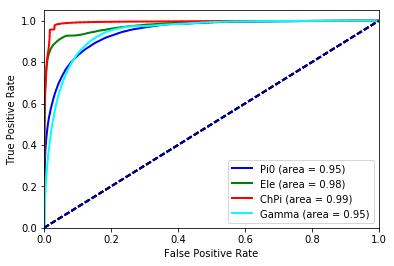

In [5]:
# Make the ROC Curves
# Also performs inference on the test data, returning the results
from DLAnalysis.Classification import *
result,NewMetaData=MultiClassificationAnalysis(MyModel,[Test_X_ECAL,Test_X_HCAL],Test_Y,BatchSize,
                                                       IndexMap={0:'Pi0', 2:'ChPi', 3:'Gamma', 1:'Ele'})

In [6]:
# Bin the data
Energy=target[:,:,2].flatten()

def AUCvsEnergy(E_min=10.,E_max=510.,E_bins=100.):
    BD,E_binning=BinDataIndex(Energy, E_min, E_max, E_bins)
    # Run the Classification Analysis in Bins
    return BinMultiClassificationAnalysis(MyModel,Test_Y=Test_Y,Y_binning=E_binning,
                                          bin_indecies=BD, result=result,
                                          IndexMap={0:'Pi0', 2:'ChPi', 3:'Gamma', 1:'Ele'})

/home/afarbin/.virtualenvs/keras2/local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


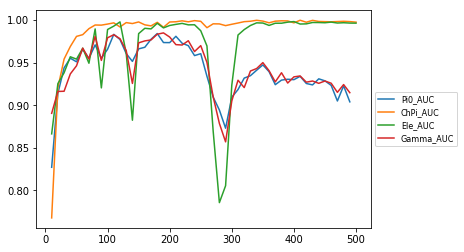

In [7]:
# Full Energy Range
Res=AUCvsEnergy(10.,510.,50.)

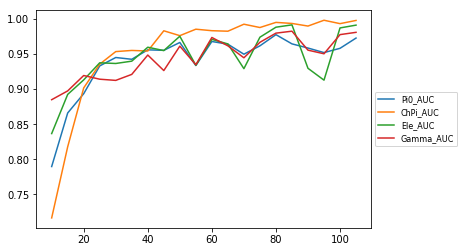

In [8]:
# 10 to 100 GeV
Res=AUCvsEnergy(10.,110.,20.)

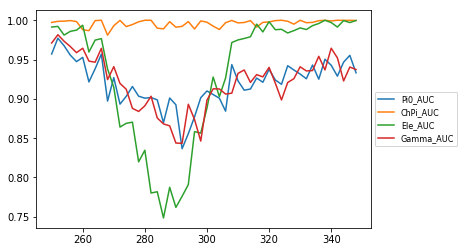

In [9]:
# 250 to 350 GeV
Res=AUCvsEnergy(250.,350.,50.)

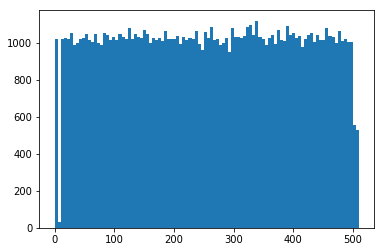

In [10]:
tmp=plt.hist(Energy,bins=100)